In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("/content/winetest.csv")
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [ ]:
df.fillna(df.mean(), inplace=True)

<ipython-input-5-bf934754a5b1>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [ ]:
df['type']=pd.get_dummies(df['type'],drop_first=True)
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('quality',axis=1))

StandardScaler()

In [ ]:
from sklearn.model_selection import train_test_split
X=df.drop('quality',axis=1)
y=df['quality']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.5948717948717949


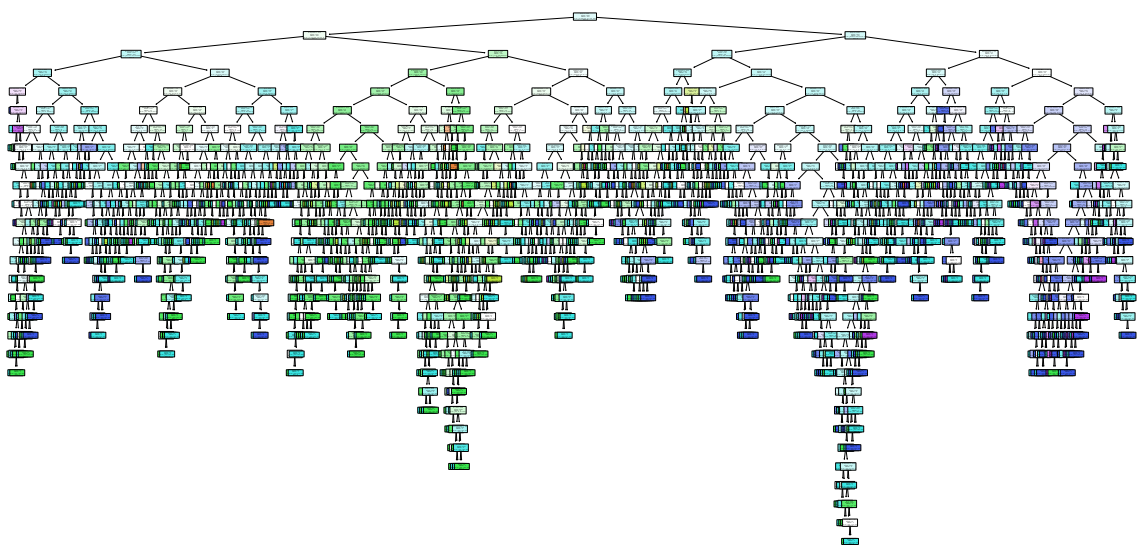

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, rounded=True, class_names=[str(class_name) for class_name in df["quality"].unique()], feature_names=df.columns[:-1])
plt.show()

In [ ]:
def candidate_elimination(X, Y):
    n = len(X[0])
    positive_hypothesis = [['?' for i in range(n)] for j in range(1)]
    negative_hypothesis = [['0' for i in range(n)] for j in range(1)]

    for i in range(len(X)):
        x = X[i]
        label = Y[i]

        if label == 'Yes':
            for j in range(len(positive_hypothesis)):
                for k in range(n):
                    if x[k] != positive_hypothesis[j][k]:
                        positive_hypothesis[j][k] = '?'

            for j in range(len(negative_hypothesis)):
                if all([negative_hypothesis[j][k] == x[k] or negative_hypothesis[j][k] == '0' for k in range(n)]):
                    negative_hypothesis.pop(j)
                    j -= 1

            for j in range(len(positive_hypothesis)):
                if any([positive_hypothesis[j][k] != x[k] and positive_hypothesis[j][k] != '?' for k in range(n)]):
                    positive_hypothesis.append(['?' for k in range(n)])

        elif label == 'No':
            for j in range(len(negative_hypothesis)):
                for k in range(n):
                    if x[k] != '0' and x[k] != negative_hypothesis[j][k]:
                        negative_hypothesis[j][k] = x[k]

            for j in range(len(positive_hypothesis)):
                if all([positive_hypothesis[j][k] == x[k] or positive_hypothesis[j][k] == '?' for k in range(n)]):
                    positive_hypothesis.pop(j)
                    j -= 1

            for j in range(len(negative_hypothesis)):
                if any([negative_hypothesis[j][k] != x[k] and negative_hypothesis[j][k] != '0' for k in range(n)]):
                    negative_hypothesis.append(['0' for k in range(n)])

    return positive_hypothesis, negative_hypothesis


X = [['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same'],
     ['Sunny', 'Warm', 'High', 'Strong', 'Warm', 'Same'],
     ['Rainy', 'Cold', 'High', 'Strong', 'Warm', 'Change'],
     ['Sunny', 'Warm', 'High', 'Strong', 'Cool', 'Change']]

Y = ['Yes', 'Yes', 'No', 'No']

positive_hypothesis, negative_hypothesis = candidate_elimination(X, Y)

print("Positive Hypothesis: ", positive_hypothesis)
print("Negative Hypothesis: ", negative_hypothesis)


Positive Hypothesis:  ['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
Negative Hypothesis:  ['?', '?', '?', '?', '?', '?']
